In [1]:
import numpy as np
%matplotlib ipympl
%matplotlib inline
import matplotlib.pyplot as plt
from latexify import latexify
import os
#%matplotlib ipympl
#import seaborn as sns # it will set to SNS style
#sns.reset_orig() # set back to the Matplotlib style
#sns.set() # set to sns style

# print plt.style.available # all available styles

# you set differnt styles
#plt.style.use('ggplot')
#plt.style.use('presentation')
#plt.style.use(['dark_background', 'presentation'])

# OR set style temperarily
#with plt.style.context('styleName'):
#    plt.plot()

# you can set color_palette of sns
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#ax.set_color_cycle(sns.color_palette(flatui)) 
# OR 
#ax.set_color_cycle(sns.color_palette('name'))
# OR
#sns.set_palette("husl") # only when using sns for plot


# set the font
#plt.rcParams["font.family"] = 'arial'
#%matplotlib notebook

#from latexify import latexify

'If you want the regular text to look like the mathtext text, \nyou can change everything to Stix. This will affect labels, titles, ticks, etc.'

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


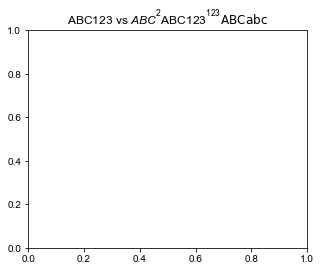

In [2]:
import matplotlib
'''To make the tex-style/mathtext text look like the regular text, 
you need to set the mathtext font to Bitstream Vera Sans:'''

matplotlib.rcParams['mathtext.fontset'] = 'custom'
# set the font
plt.rcParams["font.family"] = 'arial' #'Bitstream Vera Sans'# 'arial' #
matplotlib.rcParams['mathtext.rm'] = 'arial' #'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'arial:italic' #'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'arial:bold' #'Bitstream Vera Sans:bold'
fig, ax = plt.subplots(figsize=(5, 4))
matplotlib.pyplot.title(r'ABC123 vs $ABC^2\mathrm{ABC123}^{123}\mathsf{ABCabc}$')

'''If you want the regular text to look like the mathtext text, 
you can change everything to Stix. This will affect labels, titles, ticks, etc.'''

# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'arial' #'STIXGeneral'
# matplotlib.pyplot.text(0.,0.5,r'ABC123 vs $\mathrm{ABC123}^{123}\mathsf{ABCabc}$')

#plt.style.use(u'classic')#u'seaborn-paper') # Set back to default

In [3]:
(491+375+375)/3.*0.0001*8*3.1415**2

3.2659884299333335

In [3]:
from matplotlib.text import Text
class DragTextHandler(object):
    """ A simple class to handle Drag n Drop.
    This is a simple example, which works for Text objects only.
    """
    def __init__(self, figure=None) :
        """ Create a new drag handler and connect it to the figure's event system.
        If the figure handler is not given, the current figure is used instead
        """

        if figure is None : figure = plt.gcf()
        # simple attibute to store the dragged text object
        self.dragged = None

        # Connect events and callbacks
        figure.canvas.mpl_connect("pick_event", self.on_pick_event)
        #figure.canvas.mpl_connect("motion_notify_event", self.on_move_event)
        figure.canvas.mpl_connect("button_release_event", self.on_release_event)

    def on_pick_event(self, event):
        " Store which text object was picked and were the pick event occurs."
        if isinstance(event.artist, Text):
            self.dragged = event.artist
            self.pick_pos = (event.mouseevent.xdata, event.mouseevent.ydata)
        return True
#     def on_move_event(self, event):# by Xu not working well (sticky to the mouse)
#         " Update text position and redraw"
#         if self.dragged is not None :
#             old_pos = self.dragged.get_position()
#             new_pos = (old_pos[0] + event.xdata - self.pick_pos[0],
#                        old_pos[1] + event.ydata - self.pick_pos[1])
#             self.dragged.set_position(new_pos)
#             #self.dragged = None
#             plt.draw()
#         return True
    def on_release_event(self, event):
        " Update text position and redraw"
        if self.dragged is not None :
            old_pos = self.dragged.get_position()
            new_pos = (old_pos[0] + event.xdata - self.pick_pos[0],
                       old_pos[1] + event.ydata - self.pick_pos[1])
            self.dragged.set_position(new_pos)
            self.dragged = None
            plt.draw()
        return True
# set picker=True when drawing the Text
# dragh = DragTextHandler()

class DraggableText(object): 
    """ A simple class to handle Drag n Drop.
    This is a simple example, which works for Text objects only.
    """
    def __init__(self, figure=None):
        """ Create a new drag handler and connect it to the figure's event system.
        If the figure handler is not given, the current figure is used instead
        """
        if figure is None:
            figure = plt.gcf()          
        # simple attibute to store the dragged text object
        self.dragged = None # store the text to drag
        self.press = None # store the old text position and the press event position
        # the location of the text location in axes coords to show the position of the dragged text
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

        # Connect events and callbacks
        figure.canvas.mpl_connect("pick_event", self.on_pick_event)
        figure.canvas.mpl_connect("motion_notify_event", self.on_motion_event)
        figure.canvas.mpl_connect("button_release_event", self.on_release_event)
     
    def on_pick_event(self, event):
        " Store which text object was picked and were the pick event occurs."
        if isinstance(event.artist, Text):
            self.dragged = event.artist
            x0, y0 = event.artist.get_position()
            self.press = x0, y0, event.mouseevent.xdata, event.mouseevent.ydata # have to insert '.mouseevent'

    def on_motion_event(self, event):
        'on motion we will move the rect if the mouse is over us'
        if self.press is None: return
        x0, y0, xpress0, ypress0 = self.press
        new_position = (x0+event.xdata - xpress0, y0+event.ydata - ypress0)
        self.dragged.set_position(new_position)
        self.txt.set_text('x=%1.2f, y=%1.2f' % new_position)
        plt.draw()

    def on_release_event(self, event):
        'on release we reset the press data'
        self.press = None
        self.txt.set_text('')
        plt.draw()
        return
# set picker=True when drawing the Text
# dragh = DragTextHandler()

## Cp of crystal Nd2Zr2O7 in zero field (fit nuclear, magnon, phonon)

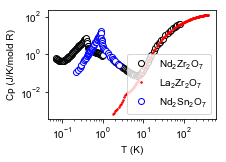

In [4]:
# ｌｏａｄ　ｄａｔａ
fpath = r'D:\3_Physical Properties\Heat_Capacity\1_Cp_NdZrO_Ausburg'
fname0 = r'cp_ndzro_lowT_with_ppms.txt'
fname1 = r'cp_lazro_2-400k.txt'
fname2 = r'Nd2Sn2O7_digitized_1969Blote.txt' # T, Cp/R(JK/mol Nd)
#fname = r'cp_ndzro_lowT_with_ppms_subLa.txt'
f0 = os.path.join(fpath, fname0)
f1 = os.path.join(fpath, fname1)
f2 = os.path.join(fpath, fname2)
cpnd = np.genfromtxt(f0, usecols=(0,1), skip_header=1)
cpla = np.genfromtxt(f1, usecols=(0,1), skip_header=1)
cpndsn = np.genfromtxt(f2, usecols=(0,1), skip_header=1)
cpndsn[:,1] = 2*8.315*cpndsn[:,1] # convert to Cp/mol

#%matplotlib inline
fig=plt.figure(figsize=(3,2))
ax = fig.add_subplot(111, xscale='log', yscale='log')# autoscale_on=True, xlim=(0.01, 10), ylim=(0., 0.65),
ax.plot(cpnd[:,0], cpnd[:,1]/2,'o', mfc='white',mec='black',label=r'Nd$_2$Zr$_2$O$_7$')
ax.plot(cpla[:,0], cpla[:,1]/2,'r.',markersize=3,label=r'La$_2$Zr$_2$O$_7$')
ax.plot(cpndsn[:,0], cpndsn[:,1]/2,'o',mfc='white',mec='blue',label=r'Nd$_2$Sn$_2$O$_7$')
ax.set_xlabel('T (K)')
ax.set_ylabel('Cp (J/K/mold R)')
plt.legend()
plt.show()

# Export data for Owen
#np.savetxt(os.path.join(fpath, 'Nd2Zr2O7_Cp_2-100K.txt'),np.vstack([cpnd[:,0],cpnd[:,1]/2]).T)
#np.savetxt(os.path.join(fpath, 'La2Zr2O7_Cp_2-300K.txt'),np.vstack([cpla[:,0],cpla[:,1]/2]).T)

In [5]:
#　Ｄｅｆｉｎｅ　ｆｕｎｓ　ｆｏｒ　Ｃｐ　ｏｆ　ｎｕｃｌｅａｒ　１／Ｔ２，　ｍａｇｎｏｎ　Ｔ３　ａｎｄ　ｐｈｏｎｏｎ　Ｔ３
from scipy import optimize

R = 8.314 #in J/K/mol

def cpNuclear(t, n):
    return R*n/t**2

def cpMag(t, a,b):
    return R*a*t**b    

def cpnm(t,n,a,b):# nuclear + mag
    return R*n/t**2 + R*a*t**b 

def cpph(t,n): # phonon
    return R*n*t**3

def cpph0(t,n0,n1): # phonon
    return n0*t**3 + n1*t**5
# def cpph1(t,n,m):
#     return R*n*t**m

def cpph1(t,*args):
    #print len(args), args
    if len(args)==1:
        return R*args[0][0]*t**args[0][1]
    else:
        return R*args[0]*t**args[1]

def cpNuclear1(t, n,m):
    return R*n/t**m

def cpnm1(t,n,m,a,b):
    return R*n / t**m + R*a * t**b 

def fitReg(dat, *args):
    if len(args)==1:# when the low and high limits is in a list
        mask = (args[0][0]< dat[:,0]) & (dat[:,0] < args[0][1])
    else: # two augs give the the two limits
        mask = (args[0]< dat[:,0]) & (dat[:,0] < args[1])
    return dat[mask,:]

#print fitReg(cpnd,0.0,0.2)

# Test fit
popt, pcov = optimize.curve_fit(cpnm, fitReg(cpnd,[0.0,0.2])[:,0], fitReg(cpnd,0.0,0.2)[:,1], [0.00065,50,3])
print(popt)

[6.08283701e-04 3.44451182e+01 2.83960860e+00]


('Data', 'Nuclear$\\sim T^{-2}$', 'Magnon$\\sim T^{3}$', 'Nuclear+magnon')


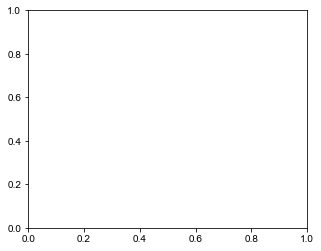

interactive(children=(FloatSlider(value=0.0, description='x1', max=0.2, step=0.005), FloatSlider(value=0.18, d…

<function __main__.pltFitReg(x1, x2=0.18)>

In [6]:
# Ａｊｕｓｔ　ｔｈｅ　ｆｉｔｔｉｎｇ　ｒｅｇｉｏｎ
#　ｆｉｔ　３　ｐａｒａｍｅｔｅｒｓ　ｎ，　ａ，ｂ
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

#%matplotlib inline
fig_label = ('Data', r'Nuclear$\sim T^{-2}$', r'Magnon$\sim T^{3}$', 'Nuclear+magnon')
print(fig_label)

def pltFitReg(x1,x2=0.18):
    popt, pcov = optimize.curve_fit(cpnm, fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00065,50,3])
    print(popt)    
    
    global fig, ax
    ax.cla()
    #ax.grid(color='w', linewidth=2, linestyle='solid')
    
    ax.plot(cpnd[:,0], cpnd[:,1], 'o', mfc='white',label=fig_label[0])
    # Strange: ‘label=...’ must put after 'o'? 
    # after keyword='o', it works

    t = np.linspace(0.01, 1, 100)
    ax.plot(t, cpNuclear(t, popt[0]), 'b--', lw=0.5, alpha=1, label=fig_label[1])
    ax.plot(t, cpMag(t, popt[1], popt[2]),  'b--', lw=0.5, alpha=1, label=fig_label[2])
    #ax.plot(t, cpMag(t, 7.45, 2.32),color='orange',linestyle='--', lw=0.5, alpha=1)   
    ax.plot(t, cpnm(t,popt[0],popt[1],popt[2]), 'r', lw=1, alpha=1, label=fig_label[3])
        
    ax.set_xlim(0.05, 1)
    ax.set_ylim(0.1, 15)
    ax.set_xscale('log')
    ax.set_yscale('log')
       
    ax.set_ylabel(r'$C\mathrm{_p}$ (J/K/mol Nd)',size=14,labelpad=-1)  
    ax.set_xlabel(r'T (K)',size=14,labelpad=-1)
    
    ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)

#   ax.xaxis.set_ticks_position('bottom')
#   ax.yaxis.set_ticks_position('left')

    handles, labels = ax.get_legend_handles_labels()
    #ax.legend([handles[0],handles[3]], [labels[0],labels[3]],loc='best',numpoints=1,frameon=False,framealpha=1,fontsize=13,fancybox=True,shadow=False)
    ax.legend([handles[0],handles[3],handles[1],handles[2]], [labels[0],labels[3],labels[1],labels[2]],loc='best',numpoints=1,frameon=False,framealpha=1,fontsize=13,fancybox=True,shadow=False)
    #ax.legend(loc='best',numpoints=1,fontsize=13, frameon=False)

    ax.axvspan(0.07, 0.175, alpha=0.5, color='lightgrey')    
    ax.text(0.11, 1.2,r'Fitted'+'\n'+'region',size=14, ha='center', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    #ax.text(0.45, 9,r'$\sim T^{2.34}$',size=14,color='orange', ha='left', va='center',
             #backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    ax.text(0.072,7,r'Nd$_2$Zr$_2$O$_7$'+ '\n'+'crystal',size=14, ha='left', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    #fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT1.pdf'), bbox_inches="tight", verbose=True) 

    return fig

#interact(pltFitReg, x1=(0,0.2,0.01), x2=(0.1,0.4,0.005),__manual=True)
#interact(pltFitReg, x1=(0,0.2,0.01), x2=(0.1,0.4,0.005),continuous_update=False)

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})
interact(pltFitReg, x1=widgets.FloatSlider(min=0.,max=0.2,step=0.005,value=0.0),
         x2=widgets.FloatSlider(min=0.1,max=0.4,step=0.005,value=0.18),__manual=True) 


('Data', 'Nuclear$\\sim T^{-2}$', 'Magnon$\\sim T^{3}$', 'Nuclear+magnon', 'Phonon')


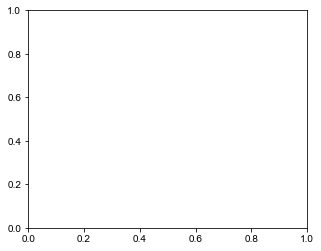

interactive(children=(FloatSlider(value=10.0, description='x1', max=18.0, min=8.0, step=0.5), FloatSlider(valu…

<function __main__.pltFitReg(x1=10, x2=18, x3=0, x4=0.18)>

In [8]:
# Ａｊｕｓｔ　ｔｈｅ　ｆｉｔｔｉｎｇ　ｒｅｇｉｏｎ ｎｕｃｌｅａｒ＋ｍａｇ＋ｐｈｏｎｏｎ
#　ｆｉｔ　４　ｐａｒａｍｅｔｅｒｓ：　ｎ　（ｎｕｃｌｅａｒ），　ａ，　ｂ　（ｍａｇｎｏｎ）　ａｎｄ　　ｎ　（ｐｈｏｎｏｎ）　
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

fig_label = ('Data', r'Nuclear$\sim T^{-2}$', r'Magnon$\sim T^{3}$', 'Nuclear+magnon', 'Phonon')
print(fig_label)

def pltFitReg(x1=10,x2=18, x3=0,x4=0.18):
    global fig, ax
    plt.cla()  
    ax.plot(cpnd[:,0], cpnd[:,1], 'o', mfc='white',label=fig_label[0])
    ax.plot(cpla[:,0], cpla[:,1],'b.',markersize=3)
#   Fit phonon with n*T**m    
#     popt0, pcov = optimize.curve_fit(lambda t, n,m: cpph1(t,n,m), fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00065,3])
#     print popt0    
#     t = np.linspace(5, 18, 100)
#     ax.plot(t, cpph1(t, popt0), 'r--', lw=0.5, alpha=1, label=fig_label[4])

#   Fit phonon with n0*T**3+n1*T**5 Note: the unit is per mole Nd
    popt0, pcov = optimize.curve_fit(lambda t, n0,n1: cpph0(t,n0,n1), fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00015,0.0000012])
    print(popt0)    
    t = np.linspace(5, 18, 100)
    ax.plot(t, cpph0(t, popt0[0], popt0[1]), 'r--', lw=0.5, alpha=1, label=fig_label[4])

#   Fit mag+nuclear with aT**-2 + bT**3        
    popt, pcov = optimize.curve_fit(cpnm, fitReg(cpnd,x3,x4)[:,0], fitReg(cpnd,x3,x4)[:,1], [0.00065,50,3])
    print(popt)
    
    t = np.linspace(0.01, 1, 100)
    ax.plot(t, cpNuclear(t, popt[0]), 'b--', lw=0.5, alpha=1, label=fig_label[1])
    ax.plot(t, cpMag(t, popt[1], popt[2]),  'b--', lw=0.5, alpha=1, label=fig_label[2])
    #ax.plot(t, cpMag(t, 7.45, 2.32),color='orange',linestyle='--', lw=0.5, alpha=1)  
    ax.plot(t, cpnm(t,popt[0],popt[1],popt[2]), 'r', lw=1, alpha=1, label=fig_label[3])

    
    ax.set_xlim(0.06, 30)
    ax.set_ylim(0.02, 30)
    ax.set_xscale('log')
    ax.set_yscale('log')
       
    ax.set_ylabel(r'Cp (J/K/mol Nd)',size=14,labelpad=-1)  
    ax.set_xlabel(r'T (K)',size=14,labelpad=-1)  
    ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend([handles[0],handles[4],handles[1]],
              [labels[0],labels[4],labels[1]],loc='best',numpoints=1,frameon=False,framealpha=1,
              fontsize=12,fancybox=True,shadow=False)
 
    ax.axvspan(0.07, 0.175, alpha=0.5, color='lightgrey')    
    ax.text(0.11, 1.4,r'Fitted'+'\n'+'region',size=13, ha='center', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    #ax.text(0.45, 9,r'$\sim T^{2.34}$',size=13,color='orange', ha='left', va='center',
             #backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    ax.text(0.4,0.2,r'Nd$_2$Zr$_2$O$_7$'+ '\n'+'crystal',size=13, ha='left', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    ax.text(3,1,r'Entropy'+'\n'+'~ 0.95R ln2',size=13, ha='left', va='center',
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    #fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT.pdf'), bbox_inches="tight", verbose=True) 
    
    return fig

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})

interact(pltFitReg, x1=widgets.FloatSlider(min=8.,max=18,step=0.5,value=10),
         x2=widgets.FloatSlider(min=11,max=20,step=0.5,value=16),
        x3=widgets.FloatSlider(min=0.,max=0.2,step=0.005,value=0.0),
         x4=widgets.FloatSlider(min=0.1,max=0.4,step=0.005,value=0.18))#,__manual=True) 


In [11]:
480+850+68+20+250+280+50

1998

('Nd$_2$Zr$_2$O$_7$', 'Nuclear$\\sim T^{-2}$', 'Magnon$\\sim T^{3}$', 'Nuclear+magnon', 'Phonon', 'La$_2$Zr$_2$O$_7$')


interactive(children=(FloatSlider(value=10.0, description='x1', max=18.0, min=5.0, step=0.5), FloatSlider(valu…

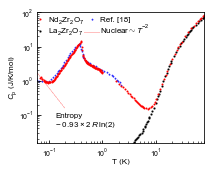

In [9]:
# Ａｊｕｓｔ　ｔｈｅ　ｆｉｔｔｉｎｇ　ｒｅｇｉｏｎ ｎｕｃｌｅａｒ＋ｍａｇ＋ｐｈｏｎｏｎ
#　ｆｉｔ　４　ｐａｒａｍｅｔｅｒｓ：　ｎ　（ｎｕｃｌｅａｒ），　ａ，　ｂ　（ｍａｇｎｏｎ）　ａｎｄ　　ｎ　（ｐｈｏｎｏｎ）　
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
latexify()
fig_label = (r'Nd$_2$Zr$_2$O$_7$', r'Nuclear$\sim T^{-2}$', r'Magnon$\sim T^{3}$', 'Nuclear+magnon', 'Phonon',r'La$_2$Zr$_2$O$_7$')
print(fig_label)

cp_rep = np.genfromtxt(r'D:\3_Physical Properties\Heat_Capacity\Cp_ndzro_reported.txt')
def pltFitReg(x1=10,x2=18, x3=0,x4=0.18):
    global fig, ax
    plt.cla()  
    ax.plot(cpnd[:,0], cpnd[:,1], 'o',mec='r', mfc='white',markersize=1,label=fig_label[0])# plot raw data: Nd
    ax.plot(cpla[:,0], cpla[:,1],'s',mec='black',mfc='white',markersize=1,label=fig_label[5],zorder=0)# plot raw data: La
    ax.plot(cp_rep[:,0],cp_rep[:,1], '^',mec='blue',mfc='white',markersize=1,label='Ref. [18]',zorder=0)
#   Fit phonon with n*T**m    
#     popt0, pcov = optimize.curve_fit(lambda t, n,m: cpph1(t,n,m), fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00065,3])
#     print popt0    
#     t = np.linspace(5, 18, 100)
#     ax.plot(t, cpph1(t, popt0), 'r--', lw=0.5, alpha=1, label=fig_label[4])

#   Fit phonon with n0*T**3+n1*T**5 Note: the unit is per mole Nd2 or La2
#     popt0, pcov = optimize.curve_fit(lambda t, n0,n1: cpph0(t,n0,n1), fitReg(cpla,x1,x2)[:,0], fitReg(cpla,x1,x2)[:,1], [0.00015,0.0000012])
#     print popt0    
#     t = np.linspace(0, x2, 100)
#     ax.plot(t, cpph0(t, popt0[0], popt0[1]), 'r--', lw=0.5, alpha=1, label=fig_label[4])

#   Fit mag+nuclear with aT**-2 exp(-d/kbT) 
#     popt, pcov = optimize.curve_fit(cpnm, fitReg(cpnd,x3,x4)[:,0], fitReg(cpnd,x3,x4)[:,1], [0.00065,50,3])
#     print popt
    
    t = np.linspace(0.01, 0.2, 100)
    ax.plot(t, 0.0062 * t**-2, 'r--', dashes=(1, 1), lw=0.5, alpha=1, label=fig_label[1]) # use fited A in A T^-2 + T^2 Exp-d/T
#     ax.plot(t, cpMag(t, popt[1], popt[2]),  'b--', lw=0.5, alpha=1, label=fig_label[2])
#     #ax.plot(t, cpMag(t, 7.45, 2.32),color='orange',linestyle='--', lw=0.5, alpha=1)  
#     ax.plot(t, cpnm(t,popt[0],popt[1],popt[2]), 'r', lw=1, alpha=1, label=fig_label[3])
        
    ax.set_xlim(0.06, 80)
    ax.set_ylim(0.015, 100)
    ax.set_xscale('log')
    ax.set_yscale('log')
       
    ax.set_ylabel(r'$C_\mathrm{p}$ (J/K/mol)',labelpad=-1)  
    ax.set_xlabel(r'T (K)',labelpad=-1)  
    ax.tick_params(axis='both',which='both',direction='in')
    
    #ax.legend(loc='best',numpoints=1,frameon=False,framealpha=1,fontsize=13,fancybox=True,shadow=False).draggable()
    ax.legend(loc=[-0.05,0.78],ncol=2,numpoints=1,frameon=False,framealpha=1,fancybox=True,
              shadow=False,handletextpad=0,columnspacing=0.,labelspacing=0).draggable()
#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend([handles[0],handles[4],handles[1]],
#               [labels[0],labels[4],labels[1]],loc='best',numpoints=1,frameon=False,framealpha=1,
#               fontsize=12,fancybox=True,shadow=False)
 
#     ax.axvspan(0.07, 0.175, alpha=0.5, color='lightgrey')    
#     ax.text(0.11, 4,r'Fitted'+'\n'+'region',size=13, ha='center', va='center',
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    #ax.text(0.45, 9,r'$\sim T^{2.34}$',size=13,color='orange', ha='left', va='center',
             #backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
#     ax.text(0.4,0.2,r'Nd$_2$Zr$_2$O$_7$'+ '\n'+'crystal',size=13, ha='left', va='center',
#              backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

    ax.text(0.13,0.06,r'Entropy'+'\n'+r'~ $0.93\,\times2\,R\,\ln(2)$', ha='left', va='center',picker=True,
             backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    #dragh = DragTextHandler()#set picker=True when drawing the Text
    #dragh = DraggableText(fig)
    #fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT0_new.pdf'), bbox_inches="tight", verbose=True) 
    
    return

fig, ax = plt.subplots(figsize=(3,2.4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})

interact(pltFitReg, x1=widgets.FloatSlider(min=5.,max=18,step=0.5,value=10),
         x2=widgets.FloatSlider(min=11,max=50,step=0.5,value=20),
         x3=widgets.FloatSlider(min=0.,max=0.2,step=0.005,value=0.0),
         x4=widgets.FloatSlider(min=0.1,max=0.4,step=0.005,value=0.18))#,__manual=True) 

dragh = DraggableText()# must put here not in the function!!


In [20]:
# after drag the legend and text, save it
fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT000.pdf'), bbox_inches="tight", pad_inches=0.01,verbose=True) 

In [12]:
# Ｆｉｔ　ｗｉｔｈ　ａ　ｇａｐｐｅｄ　ｅｘｃｉｔａｔｉｏｎｓ　Ｔ＾－２　Ｅｘｐ（－ｄｅｌｔａ／Ｔ）
%matplotlib ipympl
def cpnmGap(t,n,a,b):# nuclear + mag
    return n / t**2 + a/t**2 * np.exp(-b/t)

# Plot to check the starting parameters
ndT, ndCp = fitReg(cpnd,0,0.5)[:,0], fitReg(cpnd,0,0.5)[:,1]
invT, logCp = 1/ndT, ndCp * ndT**2

cpNd = np.vstack([invT, logCp]).T

# t = np.linspace(0.01, 0.4, 100)
# cpfit = cpnmGap(t,0.001,5,1.1)

# x, y = 1/t, np.log2(cpfit * t**2)

# fig, ax = plt.subplots(figsize=(5, 4))

# plt.plot(cpNd[:,0],cpNd[:,1])
# plt.plot(x,y)

# plt.show()

def pltFitReg(x1=0,x2=0.3):    
    global fig, ax
    plt.cla()  
    
    popt, pcov = optimize.curve_fit(cpnmGap, fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.008,4,0.7])
    print(popt, pcov)

    # plot the raw data
    ax.plot(cpNd[:,0], cpNd[:,1], 'o', mec='b', mfc='white',label='Total specific heat') 
    # plot the subtracted data
    cpNuclear = popt[0] /  cpnd[:,0]**2
    cpSub = cpnd[:,1] - cpNuclear
    ax.plot(1/cpnd[:,0], cpSub * cpnd[:,0]**2, 'o', mfc='white',label=r'$C\mathrm{_M}$ ($C\mathrm{_N}$ subtracted)') 
    
    # plot the fit (only the mag) and the nuclear
    t = np.linspace(0.01, 0.6, 100)
    cpMag = popt[1]/t**2 * np.exp(-popt[2]/t)    
    ax.plot(1/t, cpMag * t**2, 'r-', label=r'Linear fit ($0.07-0.18\,$K)' ) 
    ax.plot(1/t, popt[0]/t**2 * t**2, 'b-', label=r'$C_\mathrm{N}\sim T^{-2}$')
    
#     cpfit = cpnmGap(t,popt[0],popt[1],popt[2])
#     x, y = 1/t, np.log2(cpfit * t**2)
#     ax.plot(x, y, 'b--', lw=0.5, alpha=1)
    
    ax.set_xlim(2.5, 15) # 1/T limit
    ax.set_ylim(0.00005, 15)   
    ax.set_yscale('log')
    
    ax.set_ylabel(r'$C\mathrm{_p}$ (J/K/mol)',size=14,labelpad=2)  
    ax.set_xlabel(r'$1\,/\,$T (K)',size=14,labelpad=2)  
    ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)
    
    plt.legend(loc='best',numpoints=1,fontsize=12, frameon=False,framealpha=1)
    #fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT1.pdf'), bbox_inches="tight", verbose=True) 
    
    return #fig
    
fig, ax = plt.subplots(figsize=(5, 4))

interact(pltFitReg, 
         x1=widgets.FloatSlider(min=0,max=0.1,step=0.01,value=0.0),
         x2=widgets.FloatSlider(min=0.1,max=0.4,step=0.01,value=0.18))#,__manual=True) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='x1', max=0.1, step=0.01), FloatSlider(value=0.18, de…

<function __main__.pltFitReg(x1=0, x2=0.3)>

In [15]:
# Ｎｄ２Ｓｎ２Ｏ７　ｔｒｙ：　Ｆｉｔ　ｗｉｔｈ　ａ　ｇａｐｐｅｄ　ｅｘｃｉｔａｔｉｏｎｓ　Ｔ＾－２　Ｅｘｐ（－ｄｅｌｔａ／Ｔ）
def cpnmGap(t,n,a,b):# nuclear + mag
    return n / t**2 + a/t**2 * np.exp(-b/t)

# Plot to check the starting parameters
ndT, ndCp = fitReg(cpndsn,0,1)[:,0], fitReg(cpndsn,0,1)[:,1]
invT, logCp = 1/ndT, ndCp * ndT**2

cpNd = np.vstack([invT, logCp]).T

def pltFitReg(x1=0,x2=0.8):    
    global fig, ax
    plt.cla()  
    cpnd = cpndsn
    popt, pcov = optimize.curve_fit(cpnmGap, fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.008,4,0.7])
    print(popt, pcov, '\n', 'The gap is:   %4f meV'%(popt[2]/11.6) )

    # plot the raw data
    ax.plot(cpNd[:,0], cpNd[:,1], 'o', mec='b', mfc='white',label='Total specific heat') 
    # plot the subtracted data
    cpNuclear = popt[0] /  cpnd[:,0]**2
    cpSub = cpnd[:,1] - cpNuclear
    ax.plot(1/cpnd[:,0], cpSub * cpnd[:,0]**2, 'o', mfc='white',label=r'$C\mathrm{_M}$ ($C\mathrm{_N}$ subtracted)') 
    
    # plot the fit (only the mag) and the nuclear
    t = np.linspace(0.01, 1, 200)
    cpMag = popt[1]/t**2 * np.exp(-popt[2]/t)    
    ax.plot(1/t, cpMag * t**2, 'r-', label=r'Linear fit (below %.2f K)'%x2 ) 
    ax.plot(1/t, popt[0]/t**2 * t**2, 'b-', label=r'$C_\mathrm{N}\sim T^{-2}$')
    ax.text(0.5,0.1,r'Nd$_2$Sn$_2$O$_7$',fontsize=14)
    
    ax.set_xlim(0.1, 5) # 1/T limit
    ax.set_ylim(0.0005, 50)   
    ax.set_yscale('log')
    
    ax.set_ylabel(r'$C\mathrm{_p}$ (J/K/mol)',size=14,labelpad=2)  
    ax.set_xlabel(r'$1\,/\,$T (K)',size=14,labelpad=2)  
    ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)
    
    plt.legend(loc='best',numpoints=1,fontsize=12, frameon=False,framealpha=1)
    #fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT1.pdf'), bbox_inches="tight", verbose=True) 
    
    return #fig
    
fig, ax = plt.subplots(figsize=(5, 4))

interact(pltFitReg, 
         x1=widgets.FloatSlider(min=0,max=5,step=0.01,value=0.0),
         x2=widgets.FloatSlider(min=0.1,max=1.0,step=0.01,value=0.4))#,__manual=True) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='x1', max=5.0, step=0.01), FloatSlider(value=0.4, des…

<function __main__.pltFitReg(x1=0, x2=0.8)>

## Calucualte entropy: old, subtract fitted phonon and nuclear

In [19]:
# Ｃａｌｃｕｌａｔｅ　ｅｎｔｒｏｐｙ：　ｔｗｏ　ｍｅｔｈｏｄｓ
%matplotlib notebook
##############################
# 1st method: use interplatation (not good) take long time
from scipy.integrate import quad, cumtrapz
from scipy.interpolate import interp1d

# subtract nuclear and magnon contributions
# take care of 'R*' in the defined functions
cpsub = cpnd[:,1] - cpNuclear(cpnd[:,0], 3.19721123e-04) - cpph1(cpnd[:,0], 1.22717554e-06, 4.12695321e+00)
cpt = np.array(cpsub) / cpnd[:,0]

# interplatation functions
cpinter= interp1d(cpnd[:,0],cpsub)
cptinter= interp1d(cpnd[:,0],cpt)

# plot
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(cpnd[:,0],cpsub)

x = np.linspace(0.072,18,500)
#ax.plot(x,np.interp(x, cpnd[:,0],cpsub))
ax.plot(x,cpinter(x))
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# calculate entropy
def entropy(t):
    return quad(cptinter,0.072,t)[0]/R/np.log2(2)
print(entropy(18))
# fig, ax = plt.subplots(figsize=(5, 4))
# ax.plot(x,[entropy(x) for  x in x]) #take long time
# fig.show()

##############################
#2nd method
cpsub = cpnd[:,1] - cpNuclear(cpnd[:,0], 3.19721123e-04) - cpph1(cpnd[:,0], 1.22717554e-06, 4.12695321e+00)

cpt = np.array(cpsub) / cpnd[:,0]
entropy = cumtrapz(cpt,cpnd[:,0], initial=0)/R/np.log(2)

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(cpnd[:,0],entropy,'-')
ax.set_xlim(0,10)
fig.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

1.3473731530833808


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Calucualte entropy: new, subtract La phonon and nuclear (fitted gapped magons)

In [78]:
from scipy.integrate import quad, cumtrapz
from scipy.interpolate import interp1d

# Subtract nuclear and La phonon
cpNu = 0.00613702 /  cpnd[:,0]**2
cpLaInter = interp1d(cpla[:,0], cpla[:,1])

cpsub = cpnd[:,1] - cpNu

mask = np.array( np.where( (cpnd[:,0]>cpla[:,0].min()) & (cpnd[:,0]<30) ) ).ravel()
cpsub[mask] = cpsub[mask] - cpLaInter(cpnd[mask,0])

cpt = np.array(cpsub) / cpnd[:,0]
entropy = cumtrapz(cpt,cpnd[:,0], initial=0.1)/2/R/np.log(2)
print(entropy[cpnd[:,0]<=10].max())

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(cpnd[:,0],entropy,'-')
ax.set_xlim(0,90)
ax.set_ylim(0,4)
fig.canvas.layout.width = '5in'
fig.canvas.layout.height= '4in'
fig.show()

0.9114454556671989


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [77]:
# ｆｉｔ　４　ｐａｒａｍｅｔｅｒｓ，　ｎ，ｍ　（ｎｕｃｌｅａｒ），　ａ，ｂ　（ｍａｇｉｏｎ）；　ｆｉｔ　ｔｈｅ　ｅｘｐｏｎｅｎｔ　ｆｏｒ　ｎｕｃｌｅａｒ　Ｃｐ　ａｌｓｏ

def pltFitReg(x1,x2):
    popt, pcov = optimize.curve_fit(lambda t, n,m, a, b: cpnm1(t, n,m,a,b), fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00065,2, 50, 3])
    #popt, pcov = optimize.curve_fit(cpnm1, fitReg(cpnd,x1,x2)[:,0], fitReg(cpnd,x1,x2)[:,1], [0.00065, 2, 50, 3])
    print(popt)
    
    global fig, ax
    plt.cla()
    ax.grid(color='w', linewidth=2, linestyle='solid')
    ax.plot(cpnd[:,0], cpnd[:,1] , 'o', mfc='none')

    t = np.linspace(0.01, 1, 100)

    ax.plot(t, cpNuclear1(t, popt[0],popt[1]), 'b--', lw=0.5, alpha=1)
    ax.plot(t, cpMag(t, popt[2], popt[3]), 'b--', lw=0.5, alpha=1)
    ax.plot(t, cpnm1(t,popt[0],popt[1],popt[2],popt[3]), color='r', lw=1, alpha=1)
       
    ax.set_xlim(0.05, 1)
    ax.set_ylim(0.1, 15)
    ax.set_xscale('log')
    ax.set_yscale('log')
    #fig.show()
    return #fig

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})
fig.canvas.layout.width = '5in'
fig.canvas.layout.height= '4in'
interact(pltFitReg, x1=(0,0.2,0.01), x2=(0.1,0.4,0.005),continuous_update=False)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.1, description='x1', max=0.2, step=0.01), FloatSlider(value=0.25, de…

<function __main__.pltFitReg(x1, x2)>

## Cp of Nd2Zr2O7 with field along [111]
1. Plot all; 
2. load and strore all data
3. Maually subtraction for each data and fitting data with gapped magon+neclear

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C vs T_Nd2Zr2O7_0.2T.TXT
C vs T_Nd2Zr2O7_0.5T.TXT
C vs T_Nd2Zr2O7_0T.TXT
C vs T_Nd2Zr2O7_1T.TXT
C vs T_Nd2Zr2O7_2T.TXT


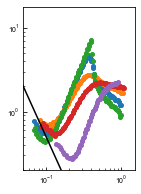

In [119]:
#　Ｃｐ　ｉｎ　ｆｉｅｌｄｓ　０，　０．２，　０．５，　２Ｔ
import numpy as np
import fnmatch
import os

fpath = r'D:\3_Physical Properties\Heat_Capacity\1_Cp_NdZrO_Ausburg'
fname = r'C vs T_Nd2Zr2O7_*.txt'
#sns.set()
#sns.reset_orig()
fig, ax = plt.subplots(figsize=(2, 3))
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#ax.set_color_cycle(sns.color_palette('husl',5))
#sns.set_style("white")

ax.set_xscale('log')
ax.set_yscale('log')
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        temp = np.genfromtxt(os.path.join(fpath,file), usecols=(0,2), skip_header=1)      
        #with plt.style.context(u'seaborn-dark-palette'):
        ax.plot(temp[:,0],temp[:,1],'o', mfc=None, ms='4')
x = np.linspace(0.01,0.5,20)        
ax.plot(x,cpNuclear(x,6.1e-04),color='black')                
ax.set_xlim(0.05, 1.5)
ax.set_ylim(0.2, 18)      
fig.canvas.layout.width = '4in'
fig.canvas.layout.height= '5in'
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C vs T_Nd2Zr2O7_0.2T.TXT
fitLimits: [0.0700202 0.1      ]
fit: [0.0005071]
C vs T_Nd2Zr2O7_0.5T.TXT
fitLimits: [0.0829959 0.1      ]
fit: [0.00078504]
C vs T_Nd2Zr2O7_0T.TXT
fitLimits: [0.0695935 0.09     ]
fit: [0.00039247]
C vs T_Nd2Zr2O7_1T.TXT
fitLimits: [0.0858277 0.1      ]
fit: [0.0007212]
C vs T_Nd2Zr2O7_2T.TXT
fitLimits: [0.138258 0.2     ]
fit: [0.00109861]


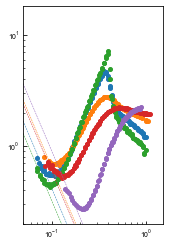

In [120]:
# 　Ｔｅｓｔ：　ｌｏａｄ，　ｆｉｔ　ｎｕｃｌｅａｒ　Ｃｐ ａｎｄ　ｐｌｏｔ
fpath = r'D:\3_Physical Properties\Heat_Capacity\1_Cp_NdZrO_Ausburg'
fname = r'C vs T_Nd2Zr2O7_*.txt'

fitHlim = [0.1,0.1,0.09,0.1,0.2] # high limit the fitting region for data 0.2T, 0.5T, 0T, 1T, 2T

fig, ax = plt.subplots(figsize=(2.5, 4))
ax.set_xscale('log')
ax.set_yscale('log')

idx = 0
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        temp = np.genfromtxt(os.path.join(fpath,file), usecols=(0,2), skip_header=1)      
        
        fitLims = np.ravel([temp[:,0].min(),fitHlim[idx]])
        print('fitLimits:', fitLims)
        popt, pcov = optimize.curve_fit(cpNuclear, fitReg(temp,fitLims)[:,0],fitReg(temp,fitLims)[:,1] , [0.00065])
        print('fit:', popt)
        
        idx = idx +1
        
        dataPlot, = ax.plot(temp[:,0],temp[:,1],'o',mec=None, ms='4')
        t = np.linspace(0.05, 1, 100)
        ax.plot(t, cpNuclear(t, popt[0]), 'b--', lw=0.5, alpha=1,color=dataPlot.get_color())
        
#x = np.linspace(0.01,0.5,20)        
#ax.plot(x,cpNuclear(x,3.1e-04),color='black')        

ax.set_xlim(0.05, 1.5)
ax.set_ylim(0.2, 18)    
fig.canvas.layout.width = '4in'
fig.canvas.layout.height= '5in'

plt.show()

In [121]:
# Ｌｏａｄ　ａｎｄ　ｓｔｏｒｅ　ａｌｌ　ｔｈｅ　ｄａｔａ in fields 0.2T, 0.5T, 0T, 1T, 2T
# find out the number of files and their names and lengths
fnamestr = []
flengths = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname): 
        #print fname
        fnamestr.append(os.path.join(fpath,file))
        temp = np.genfromtxt(os.path.join(fpath,file), usecols=(0,2), skip_header=1)  
        flengths.append(len(temp))
#print fnamestr, flengths 
#print max(flengths)

# store data into a array, short data is appended 'nan'
data = np.zeros((max(flengths),2*5))
data[:,:] = np.nan

idx = 0
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname): 
        temp = np.genfromtxt(os.path.join(fpath,file), usecols=(0,2), skip_header=1)  
        temp = temp[temp[:, 0].argsort()]
        print(file, temp.shape)
        data[:flengths[idx],idx*2:idx*2+2] = temp[:,:] # Sort: the temperature not increases monotonically for 1T data
        idx = idx + 1

# Export data for owen
# print fnamestr
# idx = 0
# for i in [2,0,1,3,4]:
#     file = fnamestr[i]
#     temp = np.genfromtxt(file, usecols=(0,2), skip_header=1)  
#     temp = temp[temp[:, 0].argsort()]
#     print file, temp.shape
#     data[:len(temp),idx*2:idx*2+2] = temp[:,:] # Sort: the temperature not increases monotonically for 1T data
#     idx = idx + 1
# np.savetxt(os.path.join(fpath,'Nd2Zr2O7_Cp_0-1K_field-[111]-0_0p2_0p5_1_2T_rawdata.txt'),data)

C vs T_Nd2Zr2O7_0.2T.TXT (118, 2)
C vs T_Nd2Zr2O7_0.5T.TXT (102, 2)
C vs T_Nd2Zr2O7_0T.TXT (119, 2)
C vs T_Nd2Zr2O7_1T.TXT (108, 2)
C vs T_Nd2Zr2O7_2T.TXT (79, 2)


In [125]:
# 　Ｍａｎｕａｌｌｙ　ｓｕｂｓｔｒａｃｔ　ｎｕｃｌｅａｒ　Ｃｐ　ａｎｄ　ｐｌｏｔ
%matplotlib ipympl
datIdx= {'0.2T':0, '0.5T':1, '0T':2, '1T':3, '2T':4}
def manSub(whichD='0T', n=0.0007):
    global fig, ax, data
    plt.cla()   
    dat = data[:, datIdx[whichD]*2:datIdx[whichD]*2+2]   
    ax.plot(dat[:,0], dat[:,1], 'o', mec='none')
    cpNcal = cpNuclear(dat[:,0], n)
    ax.plot(dat[:,0], cpNcal, 'b--', lw=0.5)
    ax.plot(dat[:,0],dat[:,1]-cpNcal, 'o', mec='none')
        
    ax.set_xlim(0.01, 1.2)
    ax.set_ylim(0.05, 18)
    ax.set_xscale('log')
    ax.set_yscale('log')
       
    ax.set_ylabel(r'Cp (J/K/mol Nd)',size=14,labelpad=-1)  
    ax.set_xlabel(r'T (K)',size=14,labelpad=-1)  
    #ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)
    #plt.show() # remove it otherwise two fig show
    #plt.draw() # for using extra fig window: plt.draw() and return fig.show()
    return #fig #.show()
#sns.reset_orig()
fig, ax = plt.subplots(figsize=(5, 4))
fig.canvas.layout.width = '5in'
fig.canvas.layout.height= '4in'
#RadioButtons
interact(manSub, whichD = widgets.Dropdown(description='Which data:',options=['0T', '0.2T', '0.5T','1T','2T']),
         n= widgets.FloatSlider(min=0.0001,max=0.001,step=0.00001,value=0.0008),__manual=True) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(Dropdown(description='Which data:', options=('0T', '0.2T', '0.5T', '1T', '2T'), value='0…

<function __main__.manSub(whichD='0T', n=0.0007)>

In [142]:
# Ｆｉｔ　ｗｉｔｈ　ａ　ｇａｐｐｅｄ　ｅｘｃｉｔａｔｉｏｎｓ　Ｔ＾－２　Ｅｘｐ（－ｄｅｌｔａ／Ｔ）
%matplotlib ipympl

def cpmGap(t,a,b):
    return a/t**2 * np.exp(-b/t)
def cpnmGap(t,n,a,b):# nuclear + mag
    return n / t**2 + cpmGap(t,a,b)

# Functions below cal a=R/2*(b/t)^2
# kb = 1.38*10**-23 # in J/K 
# R = 8.31; # in J/K/mol
# def cpmGap(t,a,b):# per mole Nd2, the un-used 'a' for keeping consistent with first def. above
#     return R/2. * b**2/t**2 * np.exp(-b/t)
# def cpnmGap(t,n,a,b):# nuclear + mag
#     return n / t**2 +  cpmGap(t,a,b)


datIdx= {'0.2 T':0, '0.5 T':1, '0 T':2, '1 T':3, '2 T':4}# the order in the data matrix

def WhichDataRegPlot(whichD='0T', x1=0, x2=0.3):    
    global fig, ax, fig1, ax1
    ax.cla();ax1.cla()  
    
    # By '2*' we have per mol Nd2Zr2O7!!!!!
    cpnd = np.vstack( ( data[:,datIdx[whichD]*2], 2 * data[:,datIdx[whichD]*2+1] ) ).T# Cp data of Nd at which field
    #cpnd[:,1] = 2 * cpnd[:,1] # not working: *2 every time change the data set 
    
    ndT, ndCp = fitReg(cpnd,0,0.5)[:,0], fitReg(cpnd,0,0.5)[:,1]
    invT, logCp = 1/ndT, ndCp * ndT**2
    cpNd = np.vstack([invT, logCp]).T

    popt, pcov = optimize.curve_fit(cpnmGap, fitReg(cpnd,x1,x2)[:,0],fitReg(cpnd,x1,x2)[:,1], [0.007,4,0.7])
    print('fitted par', popt,'\n', 'error', np.sqrt(np.diag(pcov)) )

    # plot the raw data
    ax.plot(cpNd[:,0], cpNd[:,1], 'o', mec='b', mfc='white',label='Total specific heat'+' (%s)'%whichD) 
    # plot the subtracted data
    cpNuclear = popt[0] /  cpnd[:,0]**2
    cpSub = cpnd[:,1] - cpNuclear
    ax.plot(1/cpnd[:,0], cpSub * cpnd[:,0]**2, 'o', mfc='white',label=r'$C\mathrm{_M}$ ($C\mathrm{_N}$ subtracted)') 
    
    # plot the fit (only the mag)
    t = np.linspace(0.01, 0.6, 100)
    cpMag = cpmGap(t,popt[1],popt[2])
    ax.plot(1/t, cpMag * t**2, 'r-', label=r'Linear fit (below %.2f K)'%x2 )#r'Linear fit (%.2f-%.2f K)'%(x1, x2) ) 
    
    #ax.axvspan(1/x1, 1/x2, alpha=0.5, color='lightgrey')    
    #ax.text(1/((x1+x2)/2), 0.05,r'Fitted'+'\n'+'region',size=13, ha='center', va='center',
    #         backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
    ax.set_xlim(1, 16) # 1/T limit
    ax.set_ylim(0.000001, 15)   
    ax.set_yscale('log')
    
    ax.set_ylabel(r'$C\mathrm{_p}T^2$ (JK/mol)',size=14,labelpad=2)  
    ax.set_xlabel(r'$T^{-1}\ (\mathrm{K}^{-1})$',size=14,labelpad=2)  
    ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)
    
    plt.legend(loc='best',numpoints=1,frameon=False,framealpha=1)
    #fig.savefig(os.path.join(fpath, 'nd_cp_crys_lowT_' + '%s'%whichD.replace(" ", "") + '.pdf'), bbox_inches="tight", verbose=True) 
    
    ax1.plot(cpnd[:,0],cpnd[:,1],'ro',label='data')
    t = np.linspace(0.05,0.4)
    #cpMag = popt[1]/t**2 * np.exp(-popt[2]/t)  
    cpMag = cpmGap(t,popt[1], popt[2])
    ax1.plot(t,cpMag,label='fit')
    ax1.plot(t,popt[0] / t**2,label='Nuclear')
    return #fig
    
fig, ax = plt.subplots(figsize=(5, 4))
fig1,ax1  = plt.subplots(figsize=(5, 4))
fig.canvas.layout.width = '5in'
fig.canvas.layout.height= '4in'
fig1.canvas.layout.width = '5in'
fig1.canvas.layout.height= '4in'

interact(WhichDataRegPlot, 
         whichD = widgets.Dropdown(description='Which data:',options=['0 T','0.2 T','0.5 T','1 T','2 T']),
         x1=widgets.FloatSlider(min=0,max=0.1,step=0.01,value=0.07),
         x2=widgets.FloatSlider(min=0.1,max=0.4,step=0.01,value=0.18))#,__manual=True) # For 2T use x2=0.25!!!!!
[0.0075,0.011,0.0062,0.011,0.0158]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(Dropdown(description='Which data:', options=('0 T', '0.2 T', '0.5 T', '1 T', '2 T'), val…

[0.0075, 0.011, 0.0062, 0.011, 0.0158]

In [80]:
# Ｔａｋｅ　ｔｈｅ　ｐａｒｓ　ｆｏｕｎｄ　ｍａｎｕａｌｌｙ　ａｂｏｖｅ　ａｎｄ　ｐｌｏｔ　ａｌｌ　Ｃｐ，　Ｓｕｂ　ａｎｄ　Ｃｐ　ｎｕｃｌｅａｒ
#plt.style.use(u'classic')#u'seaborn-paper')

p_lab = ['0.2 T', '0.5 T', '0 T','1 T','2 T']
nuclearN = [0.0075,0.011,0.0062,0.011,0.0158] #Fited T^-2+T^2Exp(-d/T) (2mol Nd)the parameter for nuclear Cp
lab_pos = np.array([[0.46,8.5],[0.5,5.7],[0.44,13],[0.25,1.6],[0.35,0.85]]) # Text position for 2mol Nd
#colors =["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
colors =  ['red','blue', 'green','purple', 'orange' ]
#colors = sns.color_palette("hls", 5)

fig, ax = plt.subplots(figsize=(4,5))
t = np.linspace(0.01, 0.6, 100) 
for idx, didx in enumerate([2,0,1,3,4]): # plot low field data first: 0T, 0.2T...

    dat = np.vstack( [data[:, didx*2], 2*data[:, didx*2+1] ] ).T #data[:, didx*2 : didx*2+2]
    # plot raw data
    ax.plot(dat[:,0], dat[:,1], 'o',ms=4, mec='none', mfc = colors[idx], label=p_lab[didx])
    # plot nuclear and subtracted
    ax.plot(t, nuclearN[didx]*t**-2, '--',lw= 0.5, c=colors[idx], label=r'$C_\mathrm{N}\sim T^{-2}$')   
    ax.plot(dat[:,0], dat[:,1] - nuclearN[didx]*dat[:,0]**-2, 'o',ms=4, mfc='white', mec=colors[idx])
    
    ax.text(lab_pos[didx,0],lab_pos[didx,1], p_lab[didx],size=14, ha='left', va='center',color=colors[idx],picker=True,
            backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
        
ax.set_xlim(0.06, 1.2)
ax.set_ylim(0.1, 20)
ax.set_xscale('log')
ax.set_yscale('log')
       
ax.set_ylabel(r'$C\mathrm{_p}$ (J/K/mol)',size=14,labelpad=-1)  
ax.set_xlabel(r'T (K)',size=14,labelpad=-1)  
ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)
    
#plt.legend(loc='best')

txt1= ax.text(0.07,9.5,r'Nd$_2$Zr$_2$O$_7$'+ '\n'+'crystal'+'\n' + r'H$\parallel~$[111]',size=14, ha='left', va='center',
        backgroundcolor='white',picker=True,bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

ax.text(0.31,0.28,r'Solid: raw data' +'\n'+ r'Open: 4f part'+'\n'+ r'Dashed: nuclear', 
        size=13, ha='left', va='center',picker=True,
        backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
#dragh = DragTextHandler()#set picker=True when drawing the Text
dragh = DraggableText()
#fig.savefig(os.path.join(fpath, r'nd_cp_crys_lowT_allH_dragg1.pdf'), bbox_inches="tight", verbose=True) 
fig.canvas.layout.width = '4in'
fig.canvas.layout.height= '5in'
#https://github.com/matplotlib/jupyter-matplotlib/issues/117
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [60]:
# Ｃａｌｃｕｌａｔｅ　ａｎｄ　ｐｌｏｔ　ｅｎｔｒｏｐｙ　ａｆｔｅｒ　ｓｕｂｓｔｒａｃｔｉｏｎ　ｔｈｅ　ｎｕｌｅａｒ　ｐａｒｔ
from scipy.integrate import simps, cumtrapz
p_lab = ['0.2 T', '0.5 T', '0 T','1 T','2 T']
nuclearN = [0.00035,0.0005,0.0003,0.00062,0.0008] # old manual parameter for nuclear Cp 1 mol Nd
nuclearN = [0.0075,0.011,0.0062,0.011,0.0158] #Fited T^-2+T^2Exp(-d/T) (2mol Nd)the parameter for nuclear Cp
lab_pos = np.array([[0.15,4.9],[0.82,6.49],[0.43,7.92],[0.88,5.07],[0.91,2.65]])
colors = [ 'red', 'blue', 'green','purple', 'orange']

fig, ax = plt.subplots(figsize=(4,5))
for idx, didx in enumerate([2,0,1,3,4]): # plot low field data first: 0T, 0.2T...
    dat = np.vstack( [data[:, didx*2], 2*data[:, didx*2+1] ] ).T # data[:, didx*2 : didx*2+2]
    cptSub = (dat[:,1]- nuclearN[didx]*dat[:,0]**-2) / dat[:,0]  # Cp/T

    entropy = cumtrapz(cptSub, dat[:,0], initial=0)#/R/np.log(2)
    #entropy = np.array([simps(cptSub[:t+1], dat[:t+1,0]) for t in range(len(dat))])/R/np.log(2)
    
    ax.plot(dat[:,0],entropy,'o',ms=4, mfc='white', mec=colors[idx])
    ax.plot((0, 2), (2*R*np.log(2), 2*R*np.log(2)), 'k-')
    ax.text(lab_pos[didx,0],lab_pos[didx,1], p_lab[didx],size=14, ha='left', va='center',color=colors[idx],picker=True,
            backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
    
ax.text(0.9,10.6,r'$2\,R\,\ln(2)$',size=14, ha='left', va='center',color='black',picker=True,
        backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))    
ax.text(0.05,9.7,r'Nd$_2$Zr$_2$O$_7$'+ '\n'+'crystal'+'\n' + r'H$\parallel~$[111]',size=14, ha='left', va='center',
        picker=True,backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

ax.set_xlim(0.0, 1.2)
ax.set_ylim(-0.5, 12)    
ax.set_ylabel(r'S (J/K/mol)',size=14,labelpad=5)  
ax.set_xlabel(r'T (K)',size=14,labelpad=5)  
ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3) 
dragTxt = DraggableText()
fig.canvas.layout.width = '4in'
fig.canvas.layout.height= '5in'
#fig.savefig(os.path.join(fpath, r'nd_cpS_crys_lowT_allH1.pdf'), bbox_inches="tight", verbose=True) 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Theoretical neuclear Cp in different fields
注意改上图的 per mol Nd2 not mol Nd

In [144]:
##### Define function for calculate and plot crystal field heat capacity
import sympy as sp # for calculating derivative
kb = 1.38*10**-23 # in J/K
nmol = 6.02*10**23; 
R = 8.31; # in J/K/mol
t = sp.symbols('t')

def cefcp(t, elevels, degen): # in K, meV, number
    # this fun retures a sympy object containing symbol 't'
    e = elevels*11.606*kb # in J
    g = degen
    energy = nmol*sum([ei*gi*sp.exp(-ei/kb/t) for ei,gi in zip(e, g)])/sum([gi*sp.exp(-ei/kb/t) for ei,gi in zip(e, g)])
    cp = sp.diff(energy,t)# sp.Sum can not sum over a python list, but sum can and sp.diff works on the summation
    return cp

def lamcefcp(elevels, degen):
    # return a fun that take the temperature as varable which can be array
    cefcpv = sp.lambdify(t, cefcp(t, elevels, degen), modules=['numpy', 'sympy'])
    return cefcpv

def plotcp(tRange, npts, elevels, degen):   
    temps = np.linspace(tRange[0],tRange[1],num=npts,endpoint=True)
    cefcpv = lamcefcp(elevels, degen)  
    cefcpdat = cefcpv(temps)
    #fig, ax = plt.subplots()
    global fig, ax
    plt.plot(temps, cefcpdat)
    #fig.show()
    return

[1.3        1.52173913 1.95652174 2.17391304 2.5       ]
[0.0057361]
[0.00784051]
[0.01291632]
[0.01588696]
[0.02088061]


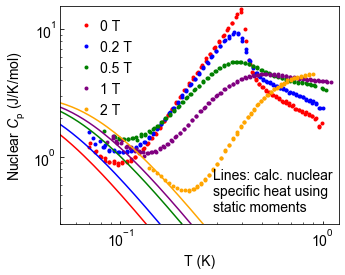

In [162]:
# Ｃａｌｃｕｌａｔｅ　ｔｈｅ　ｎｕｃｌｅａｒ　ｈｙｐｅｒｆｉｎｅ　Ｚｅｅｍａｎ　ｓｐｌｉｔｔｉｎｇ
%matplotlib inline
mun = 3.1524512550e-5 # nuclear magneton in meV/T
A143 = 0.0209 # in T, hyperfine constant for Nd143 in G: Zeeman gap = m(Nd e moment)*A (Ref: Phys. Rev. B 19, 5495 (1979).)
A145 = 0.0131
gamma143 = -14.57e6 # gyomagnetic ratio of Nd143 in rad s−1 T−1, Ref. Bertin A. PhD thesis
gamma145 = -8.894630e5 # calculated
hbar = 4.135667662e-12/(2*np.pi) # in meV/s
mub = 5.7883818012e-2 # Bohr magneton in meV/T

magf = [0., 0.2, 0.5, 1.0, 2.0]
orderM = [1.3, 1.8, 2.0, 2.3, 2.6]
orderM = np.hstack( ([1.3], np.array([0.7, 0.9, 1.0, 1.15])/1.15*2.5) ) # cal. ordered moment base on the MH in Ref.
print(orderM)

fig, ax = plt.subplots(figsize=(5, 4))

tRange, npts = [0.01, 2.0], 501
temps = np.linspace(tRange[0],tRange[1],num=npts,endpoint=True)
for idx, didx in enumerate([2,0,1,3,4]): # plot low field data first: 0T, 0.2T...
    dat = np.vstack( [data[:, didx*2], 2*data[:, didx*2+1] ] ).T #data[:, didx*2 : didx*2+2]
    # plot raw data
    ax.plot(dat[:,0], dat[:,1], 'o',ms=4, mec='none', mfc = colors[idx], label=p_lab[didx])

for i in np.arange(0,5):# the magnetic fields in T
    #energy levels in meV; total splitting = (7/2*2+1)*gap, where gap is A*M_ordered + dI*hbar*gamma*magF
    # assume B_hyper and applied B are parallel
    e1 = np.linspace(0, (A143*orderM[i]*mub + hbar*gamma143*1.*magf[i])*8,8) 
    g1 = np.ones(8) #Degenercy 
    e2 = np.linspace(0, (A145*orderM[i]*mub + hbar*gamma145*1.*magf[i])*8,8) 
    g2 = np.ones(8) #Degenercy 
    cefcpv1, cefcpv2 = lamcefcp(e1,g1), lamcefcp(e2,g2)  
    cefcpdat = 12.0/100*cefcpv1(temps) + 8.0/100*cefcpv2(temps)# add aboundance
    ax.plot(temps, 2*cefcpdat,c=colors[i]) #,label='%s'%magf[i]+' T') # per mol Nd2
    # fit the high T part with A*T^-2
    popt, pcov = optimize.curve_fit(lambda x, A: A * x**-2, temps[150:], 2*cefcpdat[150:], [0.01])
    print(popt)
    
#plt.axvline(0.07,color='black')      
ax.set_xlim([0.05,1.2])
ax.set_ylim([0.3,15])
ax.set_xscale('log')
ax.set_yscale('log')
plt.minorticks_on() 
ax.tick_params(axis='both',which='both',labelsize=14)   
ax.set_ylabel(r'Nuclear $C_\mathrm{p}$ (J/K/mol)',size=14,labelpad=5)  
ax.set_xlabel(r'T (K)',size=14,labelpad=5)  
ax.legend(loc='best' ,numpoints=1,frameon=False,framealpha=1,fontsize=14,handletextpad=0)
ax.text(0.55,0.15,'Lines: calc. nuclear \nspecific heat using \nstatic moments',size=14, ha='left', va='center',transform=ax.transAxes,
        backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
#fig.canvas.layout.width = '5in'
#fig.canvas.layout.height= '4in'
fig.savefig(os.path.join(fpath, r'nd_cal_nuclearCp.pdf'), bbox_inches="tight", verbose=True) 
fig.show()

[1.3, 1.8, 2.0, 2.3, 2.6]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

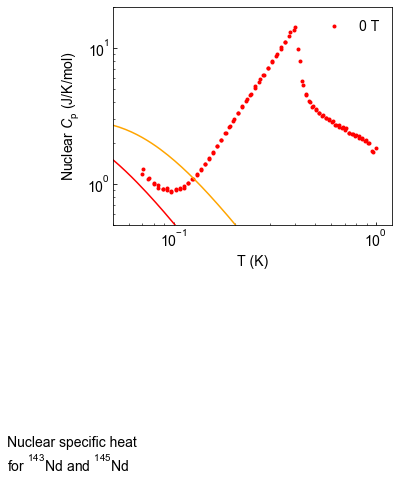

In [118]:
# Ｃａｌｃｕｌａｔｅ　ｔｈｅ　ｎｕｃｌｅａｒ　ｈｙｐｅｒｆｉｎｅ　Ｚｅｅｍａｎ　ｓｐｌｉｔｔｉｎｇ
# only zero field data
mun = 3.1524512550e-5 # nuclear magneton in meV/T
A143 = 0.0209 # in T, hyperfine constant for Nd143 in G: Zeeman gap = m(Nd e moment)*A (Ref: Phys. Rev. B 19, 5495 (1979).)
A145 = 0.0131
gamma143 = -14.57e6 # gyomagnetic ratio of Nd143 in rad s−1 T−1, Ref. Bertin A. PhD thesis
gamma145 = -8.894630e5 # calculated
hbar = 4.135667662e-12/(2*np.pi) # in meV/s
mub = 5.7883818012e-2 # Bohr magneton in meV/T

magf = [0., 0.2, 0.5, 1.0, 2.0]
orderM = [1.3, 1.8, 2.0, 2.3, 2.6]
#orderM = np.hstack( ([1.26], np.array([0.7, 0.9, 1.0, 1.15])/1.15*2.6) ) # cal. ordered moment base on the MH in Ref.
print(orderM)

fig, ax = plt.subplots(figsize=(5, 4))

tRange, npts = [0.01, 2.0], 501
temps = np.linspace(tRange[0],tRange[1],num=npts,endpoint=True)
for idx, didx in enumerate([2]): # plot low field data first: 0T, 0.2T...
    dat = np.vstack( [data[:, didx*2], 2*data[:, didx*2+1] ] ).T #data[:, didx*2 : didx*2+2]
    # plot raw data
    ax.plot(dat[:,0], dat[:,1], 'o',ms=4, mec='none', mfc = colors[idx], label=p_lab[didx])

for i in [0,4]:# the magnetic fields in T
    #energy levels in meV; total splitting = (7/2*2+1)*gap, where gap is A*M_ordered + dI*hbar*gamma*magF
    # assume B_hyper and applied B are parallel
    e1 = np.linspace(0, (A143*orderM[i]*mub + hbar*gamma143*1.*magf[i])*8,8) 
    g1 = np.ones(8) #Degenercy 
    e2 = np.linspace(0, (A145*orderM[i]*mub + hbar*gamma145*1.*magf[i])*8,8) 
    g2 = np.ones(8) #Degenercy 
    cefcpv1, cefcpv2 = lamcefcp(e1,g1), lamcefcp(e2,g2)  
    cefcpdat = 12.0/100*cefcpv1(temps) + 8.0/100*cefcpv2(temps)# add aboundance
    ax.plot(temps, 2*cefcpdat,c=colors[i]) #,label='%s'%magf[i]+' T') # per mol Nd2
    # fit the high T part with A*T^-2
    #popt, pcov = optimize.curve_fit(lambda x, A: A * x**-2, temps[150:], 2*cefcpdat[150:], [0.01])
    #print(popt)
    
#plt.axvline(0.07,color='black')      
ax.set_xlim([0.05,1.2])
ax.set_ylim([0.5,20])
ax.set_xscale('log')
ax.set_yscale('log')
plt.minorticks_on() 
ax.tick_params(axis='both',which='both',labelsize=14)   
ax.set_ylabel(r'Nuclear $C_\mathrm{p}$ (J/K/mol)',size=14,labelpad=5)  
ax.set_xlabel(r'T (K)',size=14,labelpad=5)  
ax.legend(loc='upper right' ,numpoints=1,frameon=False,framealpha=1,fontsize=14)
ax.text(0.015,0.01,r'Nuclear specific heat'+'\n'+'for $^{143}$Nd and $^{145}$Nd',size=14, ha='left', va='center',
        backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
fig.canvas.layout.width = '5in'
fig.canvas.layout.height= '4in'
#fig.savefig(os.path.join(fpath, r'nd_cal_nuclearCp.pdf'), bbox_inches="tight", verbose=True) 
fig.show()

In [65]:
'''
Hyper magnetic field is far larger than the applied field.
'''
print(r'hyper gap', 0.0209*1.0*mub, 'meV')
print(r'B_hyper/\mu_B', -0.0209*1.7*mub/(hbar*gamma143),'T')
print(r'gapped induced by the applied field', -hbar*gamma143*1, 'meV')
print('Nd143 nuclear dipolar moment in clear magneton',7/2.*gamma143*hbar/mun, 'Correct')
print('Nd145 neclear gyomagnetic ratio in rad s−1 T−1', -0.65*mun/(7/2.)/hbar)
print(np.ones(8))

hyper gap 0.0012097717964508 meV
B_hyper/\mu_B 214.45049916892668 T
gapped induced by the applied field 9.59014813179021e-06 meV
Nd143 nuclear dipolar moment in clear magneton -1.0647434566364369 Correct
Nd145 neclear gyomagnetic ratio in rad s−1 T−1 -8894630.853067324
[1. 1. 1. 1. 1. 1. 1. 1.]


In [66]:
a=5.28; b=5.59; c= 7.605
np.sqrt(a**2+b**2)/2
4.42*1.732/2
th1 = 56.6613/180*3.1415; th2 = 26.5426/180*3.1415
print(np.cos(th2)*np.sin(th2/2) / (np.sin(th1)*np.sin(th1/2)))

0.5180089199809037


In [67]:
a=4.46; b=a; c=5.93
h0,k0,l0 = 1, 1, 0
h0,k0,l0 = 1, 1, 3
h1,k1,l1 = 0, 0, 3
np.arccos(  (4/(3*a**2)*(h0*h0 + k0*k0 + 0.5*(h0*k1+k0*h1))+ l0*l1/c**2) /
            (np.sqrt((4/(3*a**2)*(h0*h0+k0*k0+h0*k0)+l0*l0/c**2)) * np.sqrt((4/(3*a**2)*(h1*h1+k1*k1+h1*k1)+l1*l1/c**2)))
         )*180/3.14

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys


nan

# Debye-Einstein fit of LaZrO

<IPython.core.display.Javascript object>


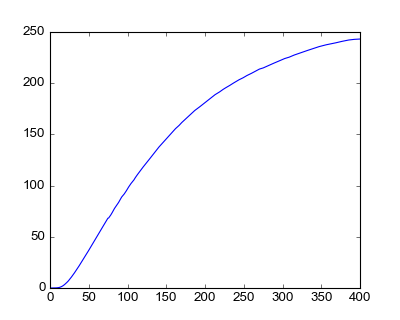

<function matplotlib.pyplot.show>

In [19]:
lafpath = 'D:\3_Physical Properties\Heat_Capacity'
lafname = '3 La2Zr2O7_ppms.txt'
lafpath = r'D:\3_Physical Properties\Heat_Capacity\1_Cp_NdZrO_Ausburg'
lafname = r'cp_lazro_2-400k.txt'
lacp = np.genfromtxt(os.path.join(lafpath,lafname), usecols=(0,1), skip_header=1)  
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(lacp[:,0],lacp[:,1])
plt.show

In [33]:
(582.9278/572.2546)**0.5/(10.67/10.80)

1.021579274705271

In [20]:
from scipy import integrate
R = 8.314 # in J/K/mol
kb = 1.38*10**-23 # in J/K
nmol = 6*10**23 # Av
hbar = 6.626e-34/(2*np.pi) #in J*s OR  4.135667662e-12/(2*np.pi) # in meV*s

def Debye(t,thetaD): # Debye model for 11 atoms in Nd2Zr2O7
    return 11* 9*R* (t/thetaD)**3 * integrate.quad(lambda x: x**4 * np.exp(x) / (np.exp(x) - 1)**2, 0, thetaD/t)[0]
vDebye = np.vectorize(Debye, excluded=['thetaD'])

def Einstein(t,thetaE): # Einstein model t and e1 are in K for 11 atoms in Nd2Zr2O7
    return 11* 3*R* (thetaE/t)**2 * np.exp(thetaE/t) / (np.exp(thetaE/t) - 1)**2
vEinstein = np.vectorize(Einstein, excluded=['thetaE'])

def DebyeEin(t,ratio,thetaD,thetaE): #Debye+Einstein Model: t, thetaD,thetaE are in K for 11 atoms in Nd2Zr2O7
    return ratio*Debye(t,thetaD) + (1-ratio)*Einstein(t,thetaE)
#     return rario* 9*R* (t/thetaD)**3 * integrate.quad(lambda x: x**4 * np.exp(x) / (np.exp(x) - 1)**2, 0, thetaD/t)[0]\
#          + (1-ratio)* 3*R* (thetaE/t)**2 * np.exp(thetaE/t) / (np.exp(thetaE/t) - 1)**2

vDebyeEin = np.vectorize(DebyeEin, excluded=['ratio','thetaD','thetaE'])

def DebyeEin0(t,ratio,ratio0, thetaD,thetaE,thetaE0): #Debye+Einstein Model: t, thetaD,thetaE are in K for 11 atoms in Nd2Zr2O7
    return ratio0* ( ratio*Debye(t,thetaD) + (1-ratio)*Einstein(t,thetaE) ) + (1-ratio0)*Einstein(t,thetaE)
vDebyeEin0 = np.vectorize(DebyeEin0, excluded=['ratio','ratio0','thetaD','thetaE','thetaE0'])

[  6.54070777e-01   7.76313335e+02   1.93491586e+02]


<IPython.core.display.Javascript object>


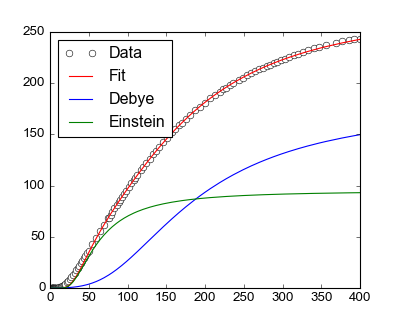

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: overflow encountered in double_scalars


In [31]:
# Ｆｉｔ　Ｄｅｂｙｅ＋Ｅｉｎ
x1,x2 = 50, 300 
popt, pcov = optimize.curve_fit(vDebyeEin, fitReg(lacp,x1,x2)[:,0],fitReg(lacp,x1,x2)[:,1], [0.5,700,200])
print popt

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(lacp[:,0],lacp[:,1],'o',c='black',mfc='white',label='Data')

fit = vDebyeEin(lacp[:,0],popt[0],popt[1],popt[2])
ax.plot(lacp[:,0],fit,c='r',label='Fit')

ax.plot(lacp[:,0], popt[0]*vDebye(lacp[:,0],popt[1]), c='b',label='Debye' )
ax.plot(lacp[:,0], (1-popt[0])*vEinstein(lacp[:,0],popt[2]),c='g',label='Einstein' )
ax.legend(loc='best')
plt.show()

In [32]:
np.savetxt( os.path.join(lafpath,'cp_lazro_2-400k_fit_Degye+Eins.txt'),np.vstack([lacp[:,0],fit]).T, fmt='%1.3e' )

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: overflow encountered in double_scalars


[  1.79659972e+00   3.96503584e-01   7.40715826e+02   1.64995201e+02
   1.00000000e+02]


C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


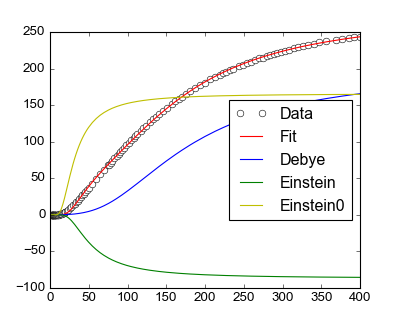

In [21]:
# Ｆｉｔ　Ｄｅｂｙｅ＋Ｅｉｎ＋Ｅｉｎ
popt, pcov = optimize.curve_fit(vDebyeEin0, lacp[:,0],lacp[:,1], [0.7,0.1, 700,200,100])
print popt

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(lacp[:,0],lacp[:,1],'o',c='black',mfc='white',label='Data')

fit = vDebyeEin0(lacp[:,0],popt[0],popt[1],popt[2],popt[3],popt[4])
ax.plot(lacp[:,0],fit,c='r',label='Fit')

ax.plot(lacp[:,0], popt[1]*popt[0]     *vDebye(lacp[:,0],popt[2]), c='b',label='Debye' )
ax.plot(lacp[:,0], popt[1]*(1-popt[0]) *vEinstein(lacp[:,0],popt[3]),c='g',label='Einstein' )
ax.plot(lacp[:,0], (1-popt[1])         *vEinstein(lacp[:,0],popt[4]),c='y',label='Einstein0' )
ax.legend(loc='best')
plt.show()